# Time Series Analysis 

We will look into the methods of analysis of time series based data.

Time series data is collection of observed data in time. The observation may have be taken in equidistant time or not. There are two domains, but not exclusive to analyse the time series data, frequancy domain and time domain. 

We will start with time domain based methods and also look into frequency domain based methods.

Time domain methods are based on presumptioon that correlation between adjacent points in time is best explained in terms of dependence of current value on past values. And this methods then models the future values as some parametric function of current and past values.

### Example : White Noise

A simple kind of series generated might be collection of uncorrelated random variables with mean 0 and finite variance s^2. This is called white noise and denoted by w_t ~wn(0, s^2).

A particular white noise is Gaussian white noise where w_t is independent normal random variabnles with mean 0 and s^^2. w_t ~ iid N(0, s^2). 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
w_t = np.random.normal(0,1,500)

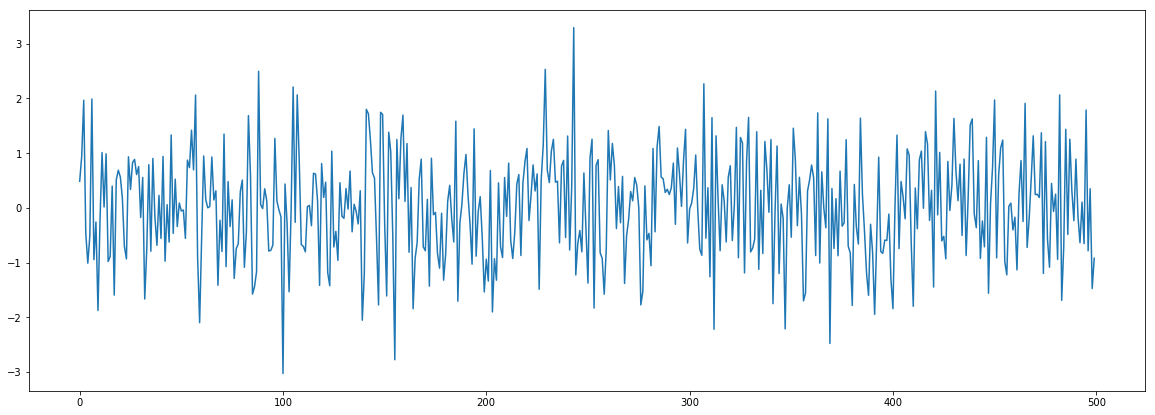

In [6]:
plt.figure(figsize=(20, 7))
plt.plot(w_t)

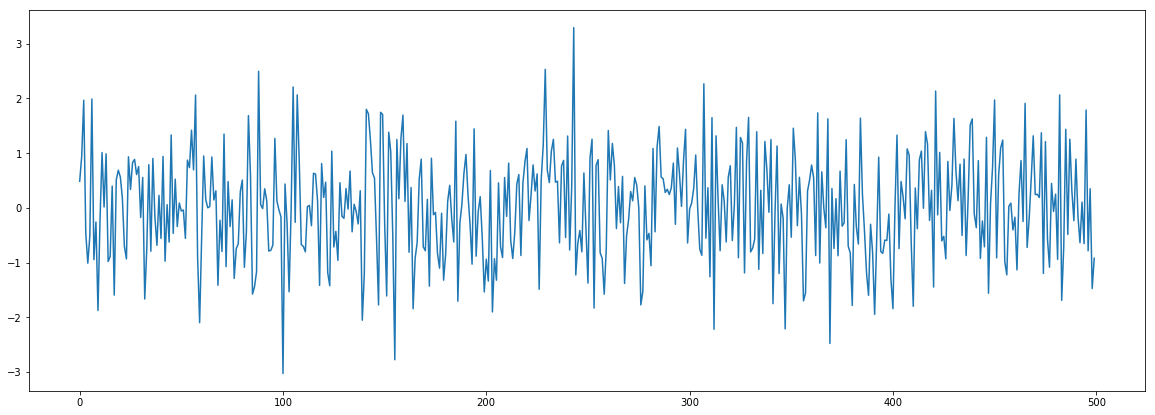

In [5]:
w_t = np.random.normal(0,1,500)
plt.figure(figsize=(20, 7))
plt.plot(w_t)

### Moving Average 

We can replace the white noise by averaging it for some past values and get moving average series that smoothes the white noise, below is an example of that, where we take v_t = (w_t-1 + w_t + w_t+1)/3

In [7]:
v_t = [(w_t[i-1]+w_t[i]+w_t[i+1])/3 for i in range(1,len(w_t)-1)]

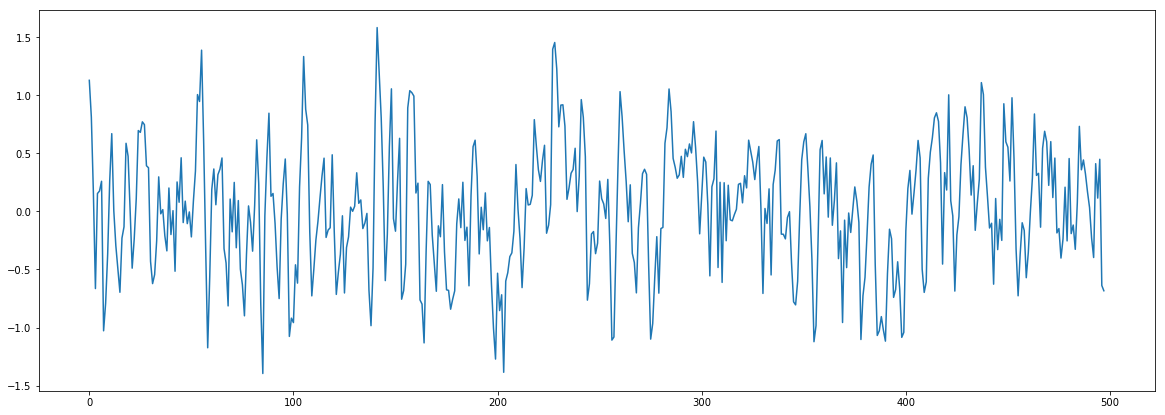

In [8]:
plt.figure(figsize=(20, 7))
plt.plot(v_t)

### Autoregression

Suppose we consider above white noise as input and calculate output as second order equation.
x_t = x_t-1 + .9 x_t-2 + w_t
As can be seen this reprsents the regression or prediction of current value as function of past values and white noise

In [9]:
x = [0 for i in range(500)]

In [11]:
x = [x[i-1] + x[i-2]*0.9 + w_t[i] for i in range(2, 500)]

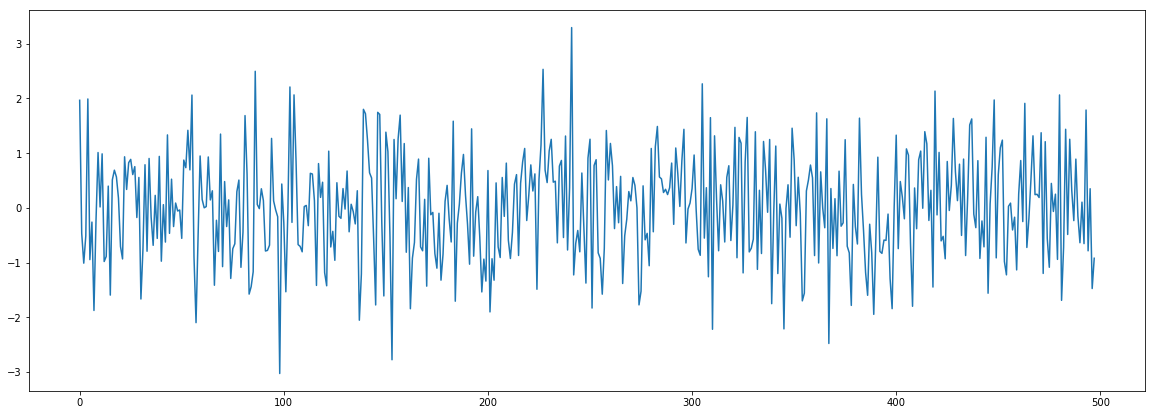

In [13]:
plt.figure(figsize=(20, 7))
plt.plot(x)

### Random Walk with Drift

Now consider example of random walk i.e sum of white noises taken upto time t, along with a drift which is deterministic value d.

r_t = d + r_t-1 + w_t

In [40]:
r_t = [ 0 for w in w_t]


In [41]:
d = 0.2
for i in range(1,500):
    r_t[i] = d + r_t[i-1] + w_t[i]

In [45]:
r_t[5]

1.9130090942741917

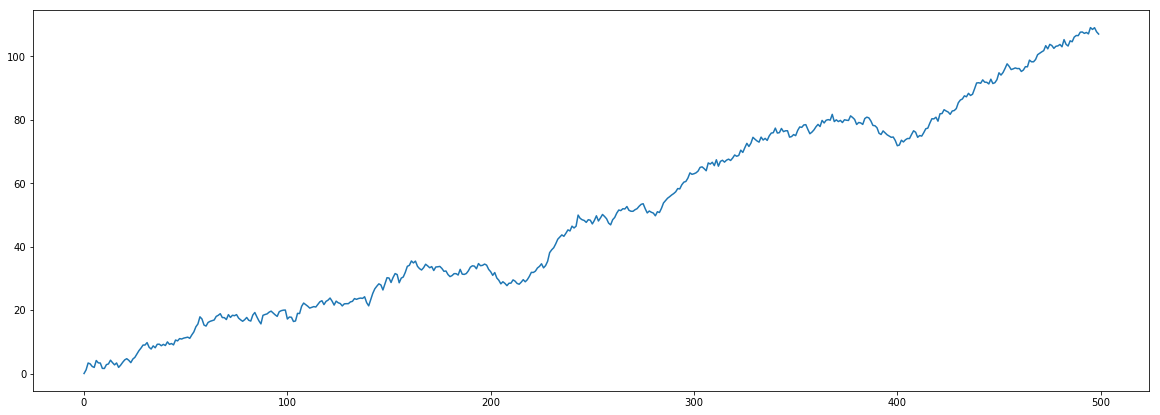

In [46]:
plt.figure(figsize=(20, 7))
plt.plot(r_t)

Now we can formally define time series and related concepts and move to analysing it.

### Time Series : 
Time series is collection of observed random variables in distinct point. 

If we consider discrete case, it is collection of n random variables observed at t_1, t_2, .. t_n. As for any collection of random varibles we can descibe it completely with joint distribution of these random variables, which provides a complete desciption.

### Mean Function

Mean function is defined as 
$$ \mu_t = E(x_t) = \int_{-\infty}^\infty xf_t(x) dx \ $$
provided it exists, where E is the expectation operator.

From above examples, mean of the moving average 

$$ v_t = \frac{1}{3}(w_{t-1} + w_t + w_{t+1}) $$

$$ E(v_t) = \frac{1}{3} [ E(w_{t-1}) + E(w_t) + E(w_{t+1})] = 0 $$

mean function of random walk with drift, we can rewrite above random walk with drift as 
$$ r_t = \delta t + \sum_{i=1}^t w_i $$ 
hence 
$$ E(r_t) = \delta t + \sum_{i=1}^t E(w_i) = \delta t $$

### Autocovariance Function

Autocovariance function is defined as 
$$ \gamma(x_s,x_t) = E[(x_s - \mu_s)(x_t-\mu_t)] $$
we can simply write it as 
$$ \gamma(s,t) = E[(x_s - \mu_s)(x_t-\mu_t)] $$
for s=t autocovariance reduces to variance
$$ \gamma(t,t) = E[(x_t-\mu_t)^2] $$

Autocovariance of white noise:
